# Machine Learning for Car Accidents 2013 - 2022

--------------------------------------------------------------------------------------------------------------------------------
#### 1) Layout of CSV file
Headers:
* Accident Year
* Casualty sex
* Casualty age
* Accident Month
* Killed or seriously injured

In [1]:
# Sam Cullen
# C00250093
import matplotlib.pyplot as plt
import pandas as pd

# from tensorflow import tf
# from fbprohet import Prophet
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

# Load data from the CSV file
data = pd.read_csv("carAccidentsData.csv")

print(data.head)


<bound method NDFrame.head of        Accident year Casualty sex  Casualty age   Weather condition  \
0               2022       Female             0  Fine no high winds   
1               2022       Female             0  Fine no high winds   
2               2022       Female             0  Fine no high winds   
3               2022       Female             0  Fine no high winds   
4               2022       Female             0  Fine no high winds   
...              ...          ...           ...                 ...   
41635           2013         Male            96  Fine no high winds   
41636           2013         Male            97  Fine no high winds   
41637           2013         Male            97  Fine no high winds   
41638           2013         Male            97  Fine no high winds   
41639           2013         Male            98  Fine no high winds   

      Accident month  Killed or seriously injured  
0            January                            1  
1           F

--------------------------------------------------------------------------------------------------------------------------------
### 2) Accidents per Year from 2013 - 2022
In the first graph, a type of wave style growth in amount of accidents through the years, excluding the years 2020 - 2022, likely due to Covid-19 pandemic which is easily seen in the drop of the amount of accidents in the second graph


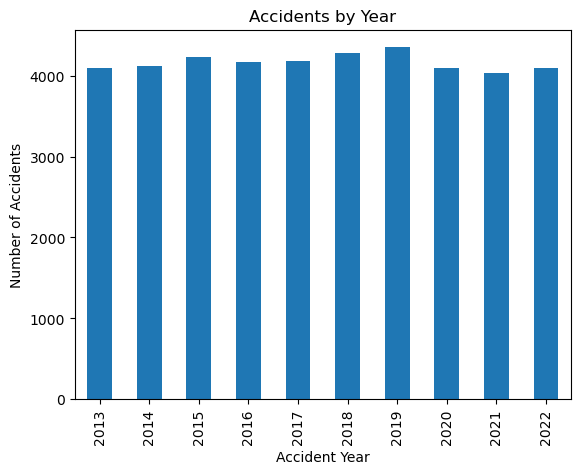

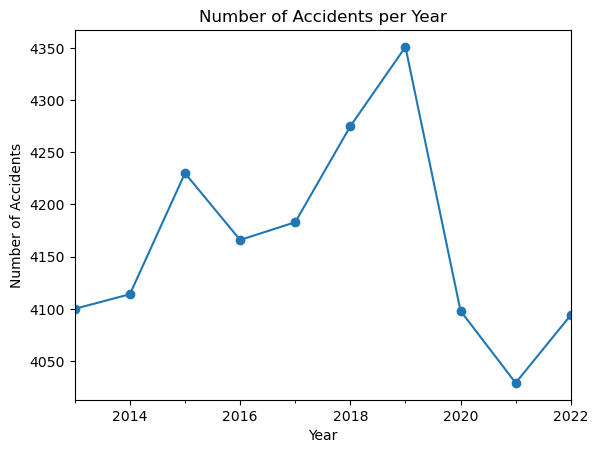

In [2]:
"""
Accidents per Year Bar Graph
This code generates a bar graph showing the number of accidents per year
It utilizes the 'Accident year' column from the provided dataset, displaying the data in a bar chart
"""
# Graph to display Accidents per year
data["Accident year"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Accident Year")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Year")
plt.show()

# Process the data
data["Accident year"] = pd.to_datetime(data["Accident year"], format="%Y")
data.set_index("Accident year", inplace=True)
# Resample data to yearly frequency and count the number of accidents per year
accidents_per_year = data.resample("Y").size()

# Plot the number of accidents per year
accidents_per_year.plot(style="o-")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents per Year")
plt.show()

--------------------------------------------------------------------------------------------------------------------------------
## 3) Accidents per month
Most accidents occurring roughly from September - February, likely due to bad weather and road conditions
#### The increase in accident in February  - April is likely due to many reasons like:
* Bad weather conditions (black ice on roads)
* Icey/slippy roads
* Poor visibility on the road
* Extremely low temperatures can affect vehicle performance, causing issues with brakes, tires, and other crucial systems

#### The increase in accidents from June - July is likely due to many reasons like:
* More drivers on the road travelling for holidays or trips while the weather is good
* The days are longer and people drive more during daylight hours. This increases traffic congestion because more cars are on the roads at the same time
* Heat makes people drowsy and disoriented
* Better weather, more people go out drinking, higher chance of drink drivers on the road


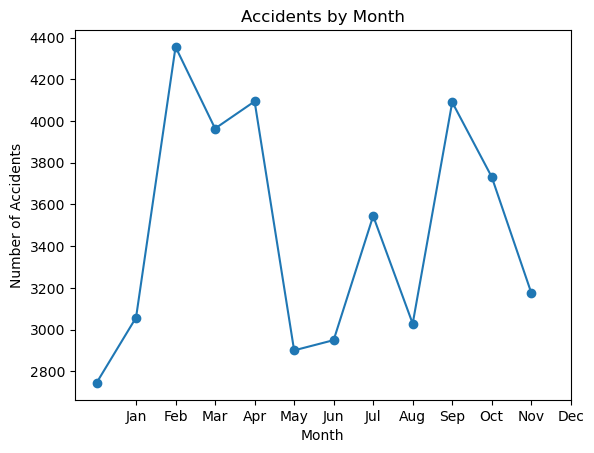

In [17]:
"""
Monthly Accidents Line Graph
This code creates a line graph to illustrate the number of accidents per month
It utilizes the 'Accident month' column from the provided dataset, sorting the data by month
The graph is labeled with months and displays the trend of accidents throughout the year
"""
# Graph to display Accidents per month
monthly_data = data["Accident month"].value_counts().sort_index()
monthly_data.plot(kind="line", marker="o")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Month")
plt.xticks(
    range(1, 13),
    [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
)
plt.show()

--------------------------------------------------------------------------------------------------------------------------------
## 4) Gender distribution for accidents
Based on the graphs, male drivers make up marginally more drivers on the road than female drivers, although male drivers make up a drastic amount of more accidents than females do.

* Studies and statistics have suggested that, on average, men tend to engage in more risk-taking behavior on the road. This may include speeding, aggressive driving, and a higher likelihood of not using seat belts.
* Vehicle Choice: Men may be more likely to choose powerful and high-performance vehicles, which can be associated with a higher risk of accidents.
* Young male drivers, in particular, are statistically more likely to be involved in accidents. Inexperience, coupled with risk-taking behavior, can contribute to a higher accident rate among this demographic.

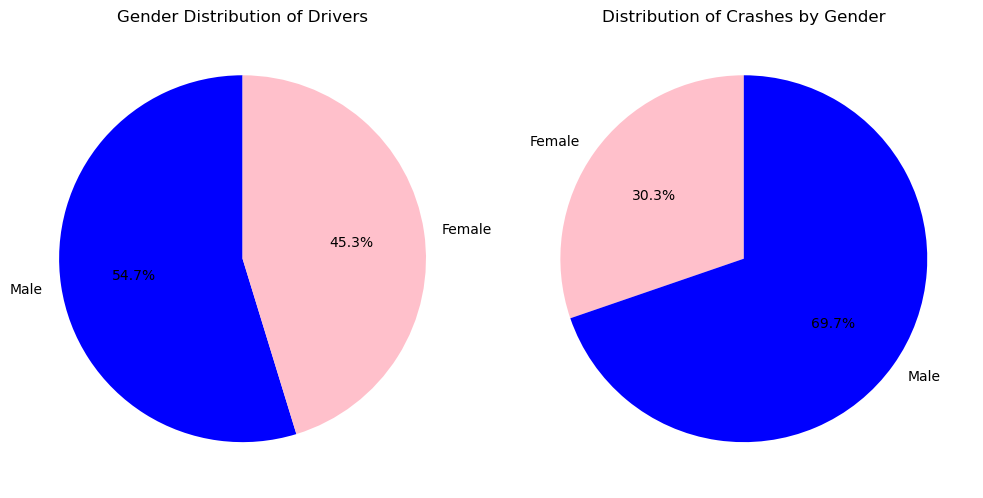

In [4]:
"""
Distribution for amount of male and female drivers
and Distribution of crashes caused by each gender
"""
# Creating a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart for number of male and female drivers
gender_counts = data["Casualty sex"].value_counts()
axes[0].pie(
    gender_counts,
    labels=gender_counts.index,
    autopct="%1.1f%%",
    colors=["blue", "pink"],
    startangle=90,
)
axes[0].set_title("Gender Distribution of Drivers")

# Pie chart of crashes caused by each gender
crash_counts = data.groupby("Casualty sex")["Killed or seriously injured"].sum()
axes[1].pie(
    crash_counts,
    labels=crash_counts.index,
    autopct="%1.1f%%",
    colors=["pink", "blue"],
    startangle=90,
)
axes[1].set_title("Distribution of Crashes by Gender")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

--------------------------------------------------------------------------------------------------------------------------------
## 5) Distribution of weather conditions in accidents
Surprisingly, I found that almost half the accidents that happen on the road are during good weather conditions, which I believe can be caused by many reasons like
* Higher Speeds: Drivers tend to travel at higher speeds in clear weather conditions, contributing to the severity of accidents when they do occur
* Driver Overconfidence: Good weather conditions can lead to overconfidence among drivers, who may underestimate the potential risks on the road. Overconfident drivers may take unnecessary risks, leading to accidents.
* Increased Traffic Volume: Good weather often means more people are out on the roads. Weekends, holidays, and rush hours during clear weather contribute to higher traffic density, 

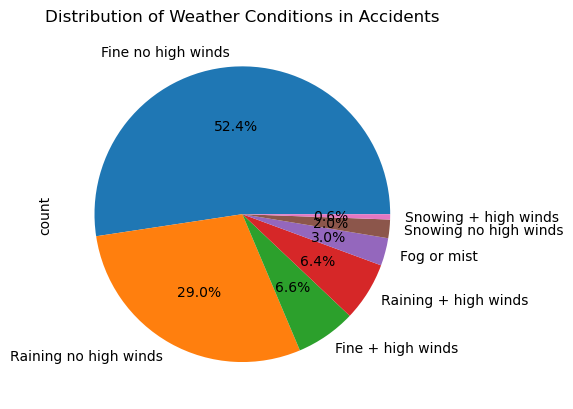

In [5]:
"""
Weather Condition Distribution Graph
This code generates a pie chart to visualize the distribution of weather conditions in accidents.
It uses the 'Weather condition' column from the dataset and displays the percentages for each category.
"""
# Graph for weather condition
data["Weather condition"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribution of Weather Conditions in Accidents")
plt.show()


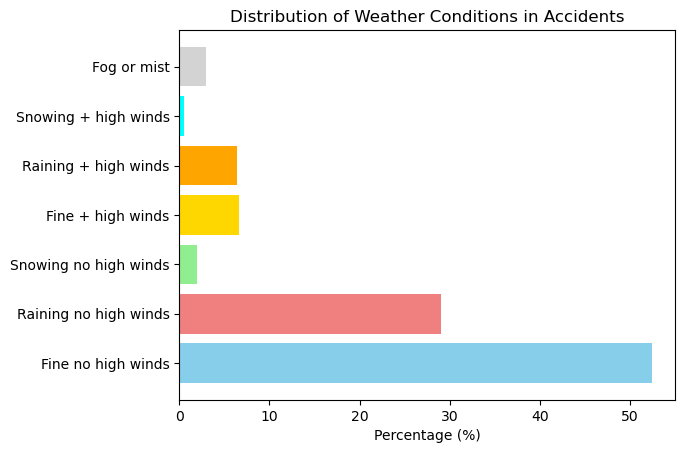

In [6]:
"""
Weather Condition Distribution Graph
Same as above, this graph shows the updated weather condition categories and makes a horizontal bar chart
It calculates the percentage distribution of specified weather conditions in the provided dataset
The resulting chart visualizes the distribution of accidents based on different weather conditions
"""
# Updated Weather Condition Categories
weather_labels = [
    "Fine no high winds",
    "Raining no high winds",
    "Snowing no high winds",
    "Fine + high winds",
    "Raining + high winds",
    "Snowing + high winds",
    "Fog or mist",
]

# Distribution of Weather Conditions Bar Chart
sizes = (
    data["Weather condition"].value_counts(normalize=True).loc[weather_labels].fillna(0)
    * 100
)

# Create horizontal bar chart
plt.barh(
    weather_labels,
    sizes,
    color=[
        "skyblue",
        "lightcoral",
        "lightgreen",
        "gold",
        "orange",
        "cyan",
        "lightgray",
    ],
)
plt.xlabel("Percentage (%)")
plt.title("Distribution of Weather Conditions in Accidents")
plt.show()

--------------------------------------------------------------------------------------------------------------------------------
## 6) Scatter Plot 2022
In the above graph, it is evident people in their early 20s are the cause of many accidents that happen throughout the years, as mentioned above, young drivers are likely to be inexperienced, reckless and have the likelihood of not wearing their seatbelts while driving 
* Inexperienced
* Reckless
* Likelihood of not wearing their seatbelts while driving

Another point where the graph spikes is in the age bracket around 45 - 60, while people in the age bracket are likely to be much more experienced drivers than a younger audience, there are factors that can affect people in this age group like
* Overconfidence: With years of driving experience, some individuals in their 40s and 50s may become overconfident in their abilities of driving, leading to carelessness while on the road
* Health Factors: Changes in health, such as declining vision or slower reaction times can contribute to an increased risk of accidents.
* Prescription Medications: Individuals in their 40s and 50s may be more likely to be taking prescription medications, some of which can have side effects that affect driving abilities.

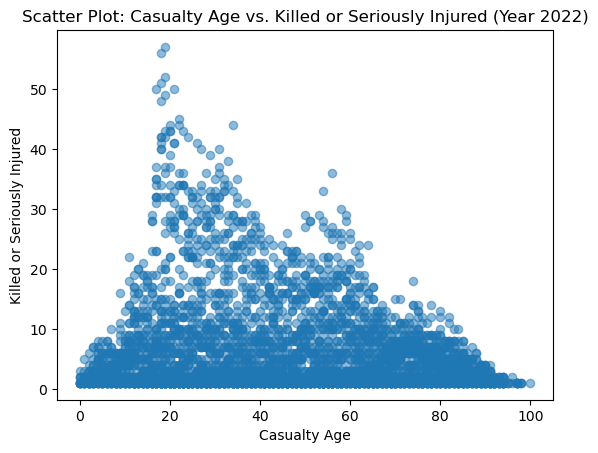

In [7]:
""" 
Displaying scatter graphs for years 2020 - 2022 displaying a 
Scatter Plot for Casualty Age vs. Killed or Seriously Injured 
"""

# 2022
# Filter data for the year 2022
data_2022 = data[data.index.year == 2022]
# Scatter plot using "Casualty age" and "Killed or seriously injured" columns for the year 2022
plt.scatter(data_2022["Casualty age"], data_2022["Killed or seriously injured"], s=35, alpha=0.5)
plt.title("Scatter Plot: Casualty Age vs. Killed or Seriously Injured (Year 2022)")
plt.xlabel("Casualty Age")
plt.ylabel("Killed or Seriously Injured")
plt.show()

--------------------------------------------------------------------------------------------------------------------------------
## 7) Scatter Plot 2021
Like the previous year, drivers in their early 20s are again the cause of most crashes, 
In this year there is an increase of crashes in the age bracket of people in their 30s, and once again people in their 50s - 60s

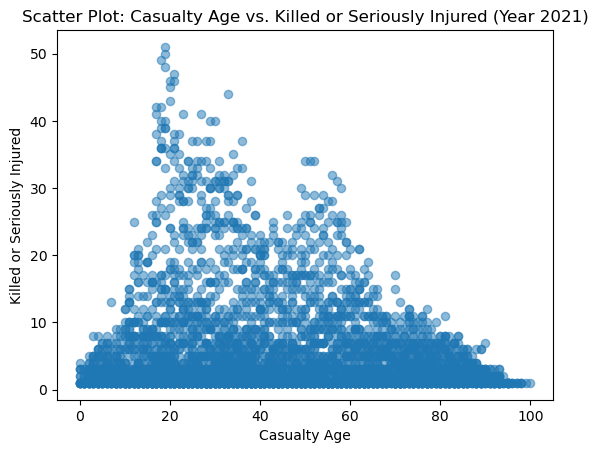

In [8]:
# 2021
# Filter data for the year 2021
data_2021 = data[data.index.year == 2021]
# Scatter plot using "Casualty age" and "Killed or seriously injured" columns for the year 2021
plt.scatter(data_2021["Casualty age"], data_2021["Killed or seriously injured"], s=35, alpha=0.5)
plt.title("Scatter Plot: Casualty Age vs. Killed or Seriously Injured (Year 2021)")
plt.xlabel("Casualty Age")
plt.ylabel("Killed or Seriously Injured")
plt.show()

--------------------------------------------------------------------------------------------------------------------------------
## 8) Scatter Plot 2020
While 2020 shows that in this year it had the highest amount of accidents from drivers in their 20s, reaching almost to 50 accidents in their age bracket alone, the age of who causes most crashes is more even, drivers between the ages 20 - 60 are almost at a reasonably even level in terms of causing the most amount of crashes 

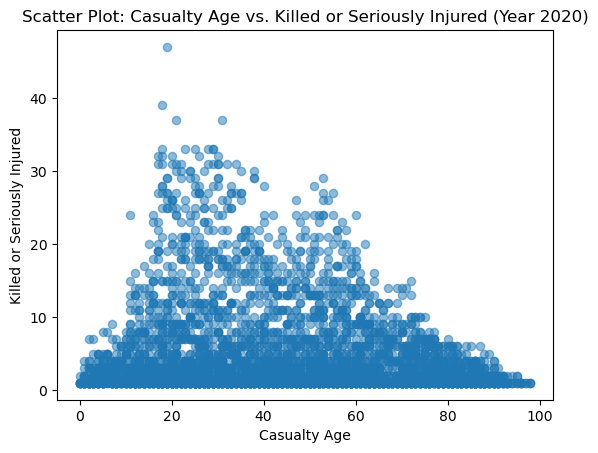

In [9]:
# 2020
# Filter data for the year 2020
data_2020 = data[data.index.year == 2020]
# Scatter plot using "Casualty age" and "Killed or seriously injured" columns for the year 2020
plt.scatter(data_2020["Casualty age"], data_2020["Killed or seriously injured"], s=35, alpha=0.5)
plt.title("Scatter Plot: Casualty Age vs. Killed or Seriously Injured (Year 2020)")
plt.xlabel("Casualty Age")
plt.ylabel("Killed or Seriously Injured")
plt.show()

--------------------------------------------------------------------------------------------------------------------------------
## 9) Scatter Plot 2019
Once more, drivers in the ages from early 20s and mid 50s are amongst the main causers of crashes throughout the year

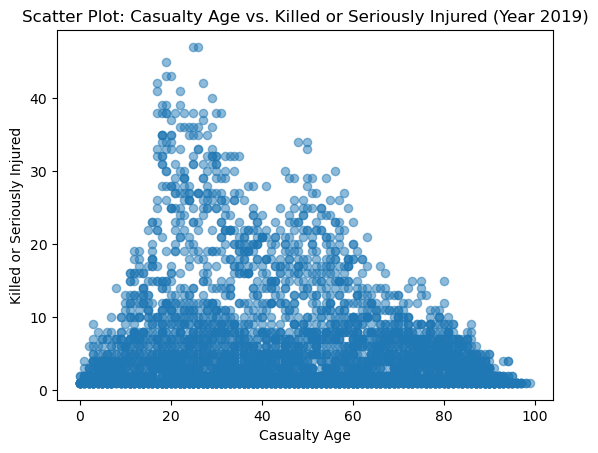

In [10]:
# 2019
# Filter data for the year 2019
data_2019 = data[data.index.year == 2019]
# Scatter plot using "Casualty age" and "Killed or seriously injured" columns for the year 2019
plt.scatter(data_2019["Casualty age"], data_2019["Killed or seriously injured"], s=35, alpha=0.5)
plt.title("Scatter Plot: Casualty Age vs. Killed or Seriously Injured (Year 2019)")
plt.xlabel("Casualty Age")
plt.ylabel("Killed or Seriously Injured")
plt.show()

--------------------------------------------------------------------------------------------------------------------------------
## 10) Scatter Plots 2019 - 2022 
#### Comparing graphs side by side

The four scatter graphs provide a visual representation of the distribution of accidents across different age brackets for the years 2019, 2020, 2021, and 2022. Each graph captures the relationship between age groups and the frequency of accidents, offering insights into the changing patterns over the specified timeframe.

Analyzing the scatter plots can show whether certain age groups consistently exhibit higher accident rates, or if there are notable fluctuations from one year to the next. Things like car insurance depend highly on these statistics, which is obvious why younger male drivers' insurance is very high when starting to drive independently. Additionally, any discernible patterns or correlations between age and accident frequency can be identified through the clustering or dispersion of data points.

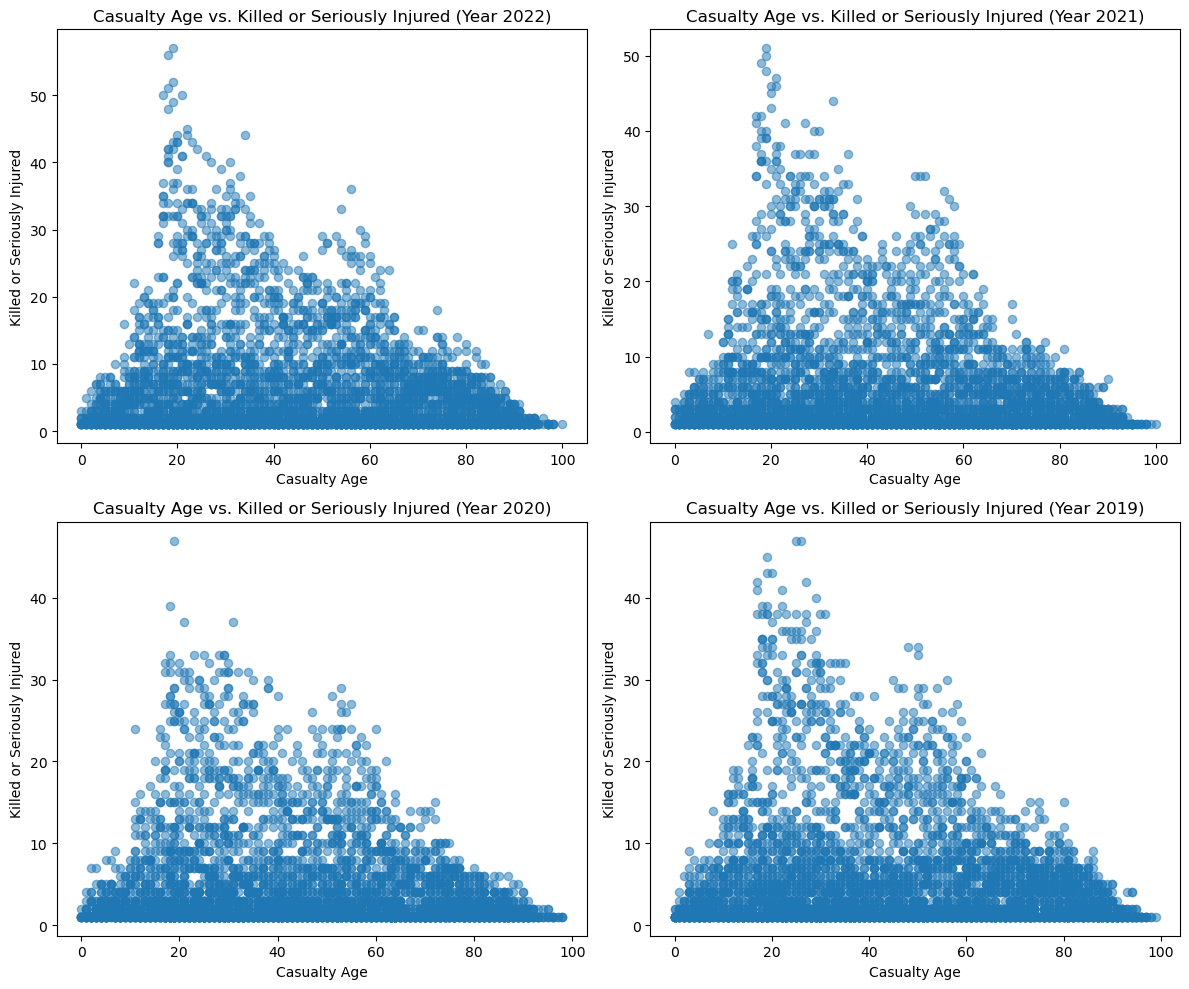

In [11]:
"""
Making a 2x2 grid of scatter plots for the above
each comparing "Casualty Age" to "Killed or Seriously Injured" for different years (2019, 2020, 2021, and 2022).
"""
# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array
axes = axes.flatten()

# Plot scatter plot for 2022
data_2022 = data[data.index.year == 2022]
axes[0].scatter(data_2022["Casualty age"], data_2022["Killed or seriously injured"], s=35, alpha=0.5)
axes[0].set_title("Casualty Age vs. Killed or Seriously Injured (Year 2022)")
axes[0].set_xlabel("Casualty Age")
axes[0].set_ylabel("Killed or Seriously Injured")

# Plot scatter plot for 2021
data_2021 = data[data.index.year == 2021]
axes[1].scatter(data_2021["Casualty age"], data_2021["Killed or seriously injured"], s=35, alpha=0.5)
axes[1].set_title("Casualty Age vs. Killed or Seriously Injured (Year 2021)")
axes[1].set_xlabel("Casualty Age")
axes[1].set_ylabel("Killed or Seriously Injured")

# Plot scatter plot for 2020
data_2020 = data[data.index.year == 2020]
axes[2].scatter(data_2020["Casualty age"], data_2020["Killed or seriously injured"], s=35, alpha=0.5)
axes[2].set_title("Casualty Age vs. Killed or Seriously Injured (Year 2020)")
axes[2].set_xlabel("Casualty Age")
axes[2].set_ylabel("Killed or Seriously Injured")

# Plot scatter plot for 2019
data_2019 = data[data.index.year == 2019]
axes[3].scatter(data_2019["Casualty age"], data_2019["Killed or seriously injured"], s=35, alpha=0.5)
axes[3].set_title("Casualty Age vs. Killed or Seriously Injured (Year 2019)")
axes[3].set_xlabel("Casualty Age")
axes[3].set_ylabel("Killed or Seriously Injured")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

## 11) Linear Regression Prediction

This chart shows a comparison between observed accident trends and the projections made by the linear regression model, offering  insights into the anticipated trajectory of car accidents in the timeframeabove. Overall, the graph serves as a tool for seeing and understanding past trends, making predictions, and representing the expected outcomes in terms of car accidents for the upcoming years.

Year 2023: Predicted Number of Accidents = 4141.93
Year 2024: Predicted Number of Accidents = 4137.92


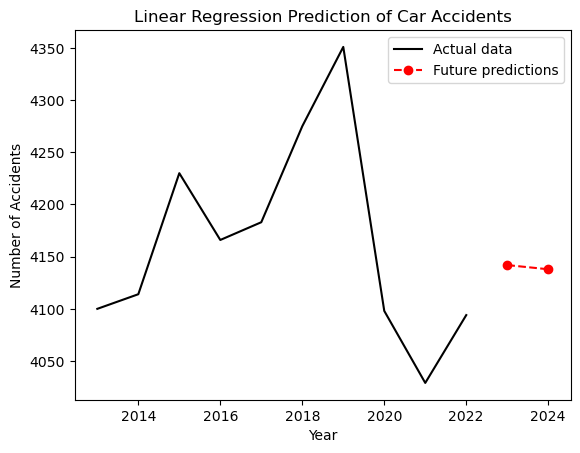

In [12]:
"""
Linear Regression Prediction of Car Accidents

This code processes car accident data, resamples it to yearly frequency, and uses linear regression
to predict the number of accidents in future years (2023 and 2024). It visualizes the actual data and
future predictions using a line plot
"""
# Process the data
# Remove leading and trailing spaces from all column names
data.columns = data.columns.str.strip()

# Resample data to yearly frequency and count the number of accidents per year
accidents_per_year = data.resample("Y").size()

# Assuming 'Accident year' is your predictor variable
# and 'Killed or seriously injured' is the target variable
X = accidents_per_year.index.year.values.reshape(-1, 1)  # Features
y = accidents_per_year.values  # Target

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Generate future years for prediction (2023 and 2024)
future_years = np.array([[2023], [2024]])

# Make predictions for future years
future_predictions = model.predict(future_years)

# Display the predictions
for year, prediction in zip(future_years.flatten(), future_predictions):
    print(f"Year {year}: Predicted Number of Accidents = {prediction:.2f}")

# Plotting the results
plt.plot(X, y, color="black", label="Actual data")
plt.plot(
    future_years.flatten(),
    future_predictions,
    color="red",
    marker="o",
    linestyle="dashed",
    label="Future predictions",
)
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Linear Regression Prediction of Car Accidents")
plt.legend()
plt.show()

## 12 Mean Squared Error 
Mean Squared Error (MSE) is a commonly used metric in machine learning to evaluate the performance of a regression model. It measures the average squared difference between the predicted values and the actual values. The formula for calculating Mean Squared Error is:

MSE= n/1 ∑ n    (Yi - ^Yi)^2
           i=1

where:

* n is the number of data points.

* Y(i) is the actual (observed) value of the target variable for the i-th data point.

* ^Y(i) is the predicted value of the target variable for the i-th data point.

MSE gives more weight to larger errors, as it involves squaring the differences. This means that larger errors contribute disproportionately more to the overall error value. The metric is useful for assessing how well a regression model approximates the true relationship between the input features and the target variable.

-----------------------------------------------------------------------------
-----------------------------------------------------------------------------

In [13]:
"""
ARIMA Time Series Forecasting
Using an ARIMA model to forecast yearly accident counts. Split data into
training and testing sets, fit the model, shows performance with MSE, and shows results
"""
# Split the data into features and target variable
X = data.drop("Killed or seriously injured", axis=1)
y = data["Killed or seriously injured"]

# Handle categorical variables with one-hot encoding
X = pd.get_dummies(X, columns=["Casualty sex", "Weather condition", "Accident month"])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Choose a different model (e.g., Random Forest)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for Killed/Seriously injured:", mse)

Mean Squared Error for Killed/Seriously injured: 8.471572943128928


In [14]:
"""
Linear Regression with Categorical Variables

This code shows the use of one-hot encoding for categorical variables,
handling missing values through imputation, and training a linear regression model
The model is evaluated using mean squared error on a test set
"""
# Handle categorical variables withh one-hot encoding
data["Casualty age"] = pd.to_numeric(data["Casualty age"], errors="coerce")
data["Casualty age"].fillna(data["Casualty age"].median(), inplace=True)

# Feature Engineering: Explore additional features or transformations
# Split the data into features and target variable
X = data.drop("Killed or seriously injured", axis=1)
y = data["Killed or seriously injured"]

# Handle categorical variables with one-hot encoding
X = pd.get_dummies(X, columns=["Casualty sex", "Weather condition", "Accident month"])
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Choose a different model (e.g., Random Forest)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for Killed/Seriously injured:", mse)


Mean Squared Error for Killed/Seriously injured: 8.482423769555027


In [15]:
"""
Calculate Averages

This script calculates the average values for the "Killed or seriously injured" and "Casualty age" columns
in the given dataset and prints the results.
"""
# Calculate the average of the "Killed or seriously injured" column
average_killed_or_injured = data["Killed or seriously injured"].mean()
print(f"Average Killed or Seriously Injured: {average_killed_or_injured}")
average_casualty_age = data["Casualty age"].mean()
print(f"Average Casualty Age: {average_casualty_age}")

Average Killed or Seriously Injured: 5.7923390970220945
Average Casualty Age: 44.86121517771374
